In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [44]:
df = pd.read_csv(r"C:\Users\kranthi kumar goli\OneDrive\Desktop\WinneQuality.csv",sep = ';')

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: ylabel='quality'>

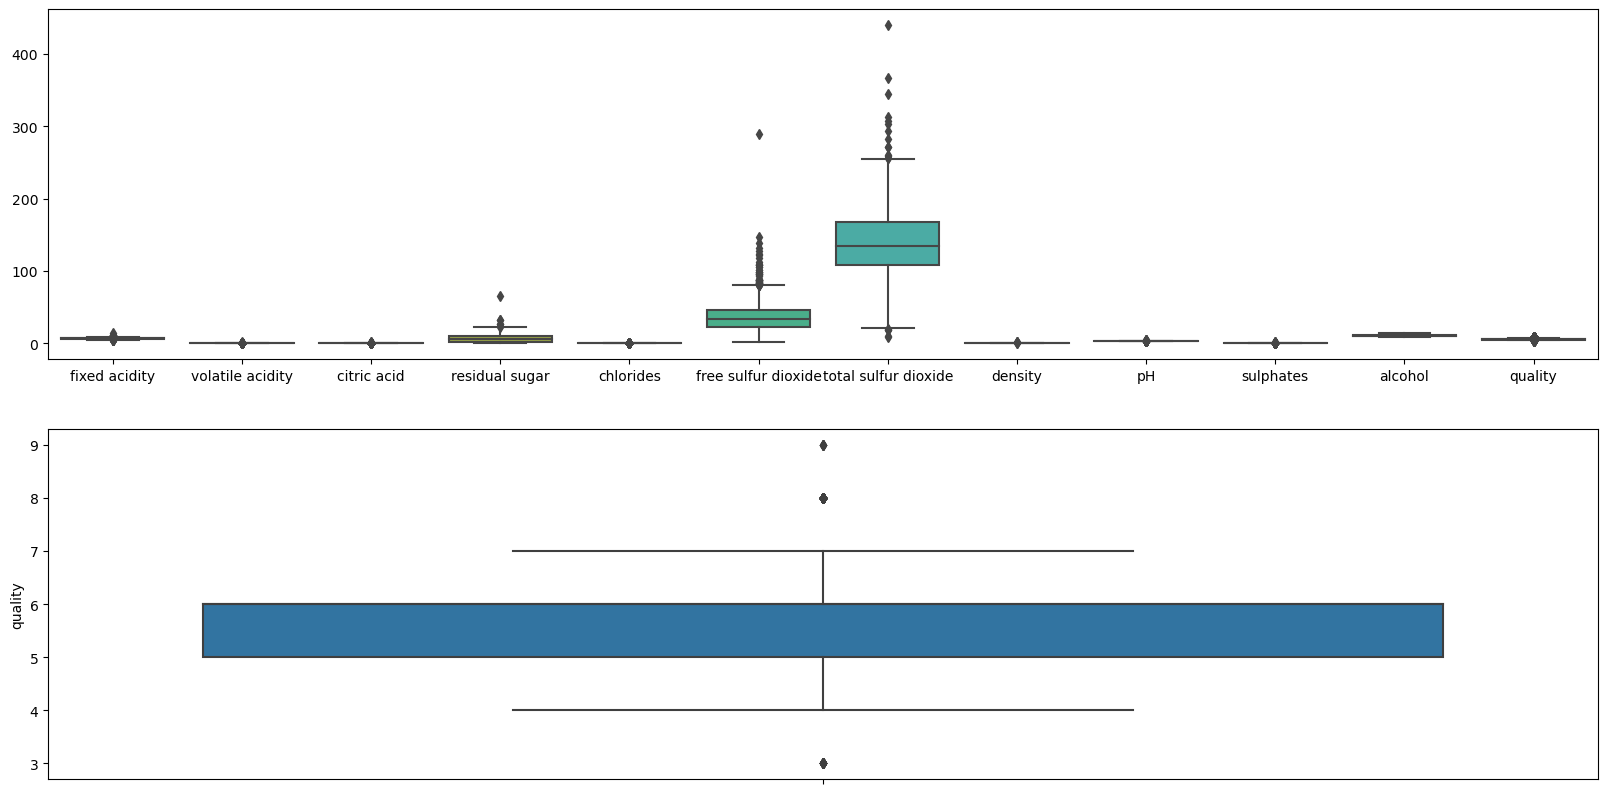

In [47]:
fig,axes = plt.subplots(nrows = 2, ncols=1)
fig.set_size_inches(20,10)
sn.boxplot(data = df, orient = 'v', ax = axes[0])
sn.boxplot(data = df, y = 'quality' , orient = 'pH', ax = axes[1])

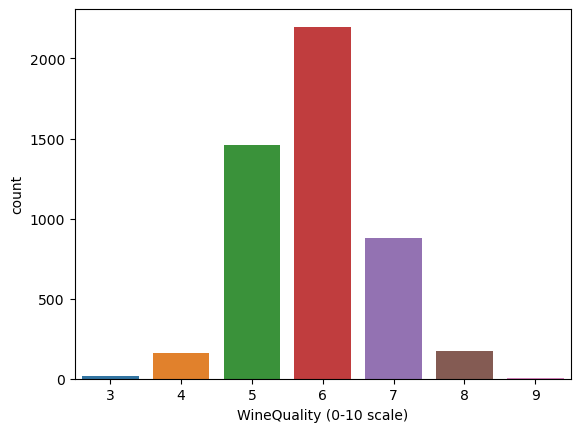

In [90]:
sn.countplot(x = "quality", data = df)
plt.xlabel("WineQuality (0-10 scale)")
plt.show()

CORRELATION ANALYSIS

<Axes: >

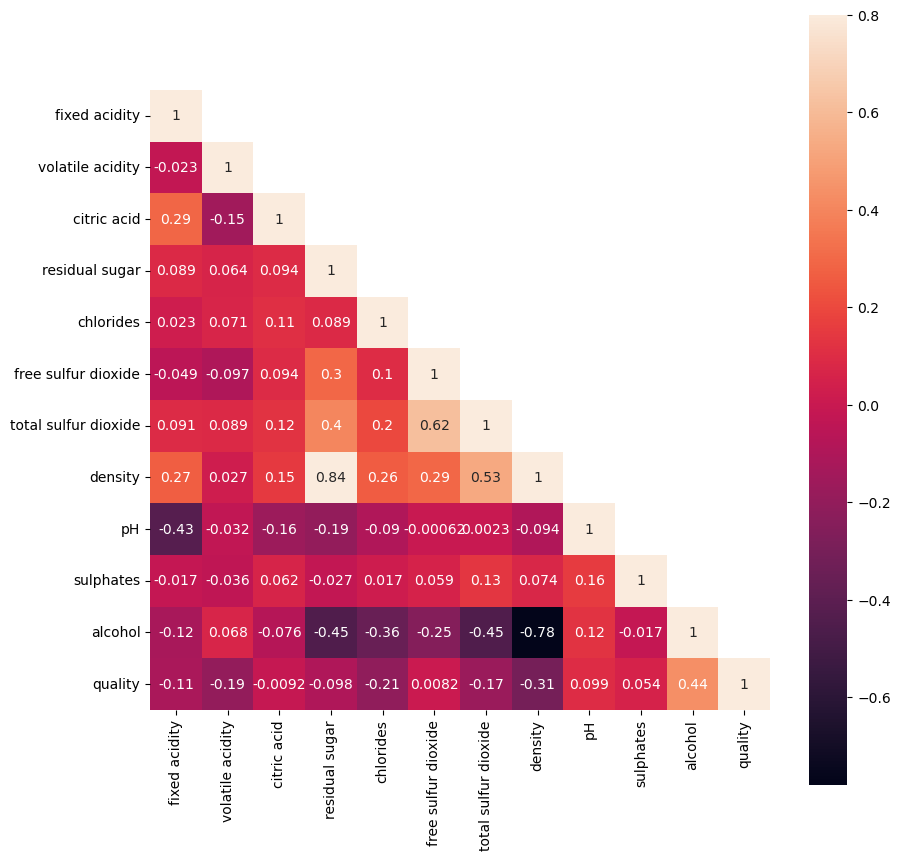

In [49]:
corre = df.corr()
mask = np.array(corre)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corre,mask = mask, vmax = .8, square = True, annot= True)

In [91]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [92]:
from sklearn.model_selection import train_test_split
X =  np.append(arr = np.ones((x.shape[0],1)),values = x, axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)

In [93]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LinearRegression

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Prediction

In [95]:
pre= regressor.predict(X_test)

In [96]:
pred = pd.DataFrame(pre)
pred.head()

,0
0,6.182034
1,6.623434
2,5.621261
3,5.421043
4,5.824158


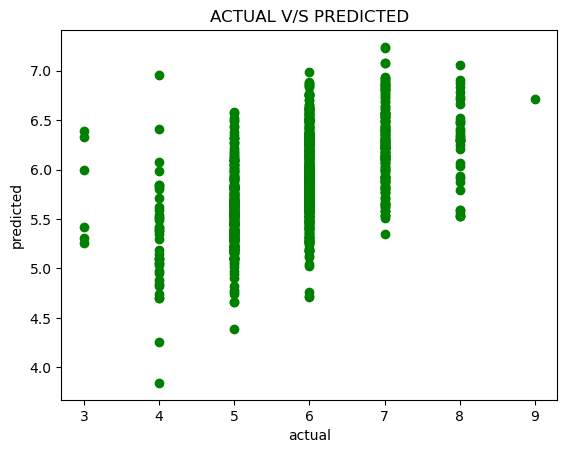

In [98]:
plt.scatter(y_test,pre, c ='g')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('ACTUAL V/S PREDICTED')
plt.show()